In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import math
import soundfile as sf
from scipy.fft import fft, ifft

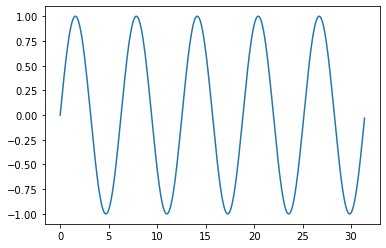

In [95]:
t = np.linspace(0, 10*np.pi, 1000)[:-1]
sig = np.sin(t)
plt.plot(t,sig)

[0.08       0.08941623 0.11727941 0.16244882 0.22307522 0.29667656
 0.38023958 0.47034322 0.56329862 0.65530016 0.74258131 0.82156875
 0.88902874 0.94219944 0.97890406 0.99763989 0.99763989 0.97890406
 0.94219944 0.88902874 0.82156875 0.74258131 0.65530016 0.56329862
 0.47034322 0.38023958 0.29667656 0.22307522 0.16244882 0.11727941
 0.08941623 0.08      ]
[0.0064     0.00799526 0.01375446 0.02638962 0.04976255 0.08801698
 0.14458214 0.22122275 0.31730533 0.42941831 0.551427   0.67497521
 0.79037209 0.88773979 0.95825315 0.99528535 0.99528535 0.95825315
 0.88773979 0.79037209 0.67497521 0.551427   0.42941831 0.31730533
 0.22122275 0.14458214 0.08801698 0.04976255 0.02638962 0.01375446
 0.00799526 0.0064    ]
0.0079952621874129


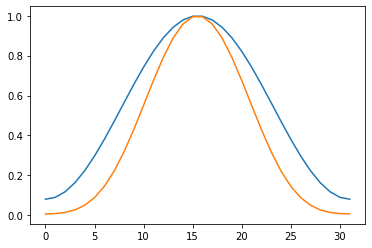

In [142]:
hamming = np.hamming(32)
sq = hamming **2
plt.plot(hamming)
plt.plot(sq)
print(hamming)
print(sq)
print(0.08941623 ** 2)

In [65]:
sig, sr = librosa.load('JCT.wav' , sr = 16000)

In [66]:
print(len(sig))

36843


In [67]:
signal, samplerate = librosa.load('JCT.wav' , sr = 16000)
print(signal.shape)

(36843,)


In [115]:
stft_lib = librosa.stft(sig,n_fft=32, win_length=32, hop_length=16,window='hamming')
print(stft_lib.shape)
# istft = librosa.istft(stft)
# print(istft.shape)
# # sf.write('librosa_output_16000.wav', istft, samplerate, 'PCM_16')

(17, 65)


In [116]:
STFT_half = STFT[:,:17].T
ori_STFT_half = ori_STFT[:,:17].T


C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


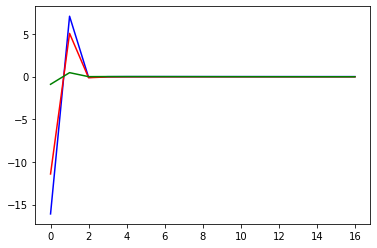

In [120]:
plt.plot(stft_lib[:,10],c='b')
plt.plot(STFT_half[:,10],c='r')
plt.plot(ori_STFT_half[:,10],c='green')


In [209]:
print(istft)

[-2.6308745e-03 -2.8971476e-03 -3.8039973e-03 ... -2.5658524e-03
 -5.0854167e-05  9.3328557e-04]


In [96]:
window_length = 32
shift = int(window_length / 2)

In [97]:
print(int(window_length - (shift+1)))
print(math.ceil(len(sig)/shift)*shift-(len(sig)-1))
print(int(window_length - (shift+1)) + math.ceil(len(sig)/shift)*shift-(len(sig)-1))

15
10
25


In [98]:
zero = np.zeros([int(window_length - (shift+1)) + int(math.ceil(len(sig)/shift)*shift-(len(sig)-1))])

In [99]:
print(len(zero))

25


In [100]:
sig = np.concatenate([sig,zero],axis=None)
print(len(sig))

1024


In [8]:
print(len(sig)-(window_length-1))

993


In [90]:
a = np.array([1,2])
b = np.array([[2,7],[3,3]])
c = a @ b
print(c)

[ 8 13]


In [112]:
window = np.hamming(window_length)
print(window)
ori_STFT = []
for i in range(0, len(sig)-(window_length-1), shift):
    print('m=',i)
    idx_list = []
    for idx in range(i,i+window_length,1):
        idx_list.append(idx)
    globals()['F{}'.format(i)] = []
    print(idx_list)
    for k in range(0, window_length,1):
        print('k=',k)
        F = 0
        for l, idx in enumerate(idx_list):
            print(l, idx)
            value = (((2*np.pi)*k*l)/window_length )*1j
            F = F + ( window[l] * sig[idx]*np.exp(value) )
        globals()['F{}'.format(i)].append(F)
    globals()['F{}'.format(i)] = np.array(globals()['F{}'.format(i)])
    globals()['F{}'.format(i)] = window * globals()['F{}'.format(i)]
        
    ori_STFT.append(globals()['F{}'.format(i)])
    
ori_STFT = np.array(ori_STFT)
            

[0.08       0.08941623 0.11727941 0.16244882 0.22307522 0.29667656
 0.38023958 0.47034322 0.56329862 0.65530016 0.74258131 0.82156875
 0.88902874 0.94219944 0.97890406 0.99763989 0.99763989 0.97890406
 0.94219944 0.88902874 0.82156875 0.74258131 0.65530016 0.56329862
 0.47034322 0.38023958 0.29667656 0.22307522 0.16244882 0.11727941
 0.08941623 0.08      ]
m= 0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
k= 0
0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
k= 1
0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
k= 2
0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 2

0 16
1 17
2 18
3 19
4 20
5 21
6 22
7 23
8 24
9 25
10 26
11 27
12 28
13 29
14 30
15 31
16 32
17 33
18 34
19 35
20 36
21 37
22 38
23 39
24 40
25 41
26 42
27 43
28 44
29 45
30 46
31 47
k= 26
0 16
1 17
2 18
3 19
4 20
5 21
6 22
7 23
8 24
9 25
10 26
11 27
12 28
13 29
14 30
15 31
16 32
17 33
18 34
19 35
20 36
21 37
22 38
23 39
24 40
25 41
26 42
27 43
28 44
29 45
30 46
31 47
k= 27
0 16
1 17
2 18
3 19
4 20
5 21
6 22
7 23
8 24
9 25
10 26
11 27
12 28
13 29
14 30
15 31
16 32
17 33
18 34
19 35
20 36
21 37
22 38
23 39
24 40
25 41
26 42
27 43
28 44
29 45
30 46
31 47
k= 28
0 16
1 17
2 18
3 19
4 20
5 21
6 22
7 23
8 24
9 25
10 26
11 27
12 28
13 29
14 30
15 31
16 32
17 33
18 34
19 35
20 36
21 37
22 38
23 39
24 40
25 41
26 42
27 43
28 44
29 45
30 46
31 47
k= 29
0 16
1 17
2 18
3 19
4 20
5 21
6 22
7 23
8 24
9 25
10 26
11 27
12 28
13 29
14 30
15 31
16 32
17 33
18 34
19 35
20 36
21 37
22 38
23 39
24 40
25 41
26 42
27 43
28 44
29 45
30 46
31 47
k= 30
0 16
1 17
2 18
3 19
4 20
5 21
6 22
7 23
8 24
9 25
10 26
11 2

k= 5
0 48
1 49
2 50
3 51
4 52
5 53
6 54
7 55
8 56
9 57
10 58
11 59
12 60
13 61
14 62
15 63
16 64
17 65
18 66
19 67
20 68
21 69
22 70
23 71
24 72
25 73
26 74
27 75
28 76
29 77
30 78
31 79
k= 6
0 48
1 49
2 50
3 51
4 52
5 53
6 54
7 55
8 56
9 57
10 58
11 59
12 60
13 61
14 62
15 63
16 64
17 65
18 66
19 67
20 68
21 69
22 70
23 71
24 72
25 73
26 74
27 75
28 76
29 77
30 78
31 79
k= 7
0 48
1 49
2 50
3 51
4 52
5 53
6 54
7 55
8 56
9 57
10 58
11 59
12 60
13 61
14 62
15 63
16 64
17 65
18 66
19 67
20 68
21 69
22 70
23 71
24 72
25 73
26 74
27 75
28 76
29 77
30 78
31 79
k= 8
0 48
1 49
2 50
3 51
4 52
5 53
6 54
7 55
8 56
9 57
10 58
11 59
12 60
13 61
14 62
15 63
16 64
17 65
18 66
19 67
20 68
21 69
22 70
23 71
24 72
25 73
26 74
27 75
28 76
29 77
30 78
31 79
k= 9
0 48
1 49
2 50
3 51
4 52
5 53
6 54
7 55
8 56
9 57
10 58
11 59
12 60
13 61
14 62
15 63
16 64
17 65
18 66
19 67
20 68
21 69
22 70
23 71
24 72
25 73
26 74
27 75
28 76
29 77
30 78
31 79
k= 10
0 48
1 49
2 50
3 51
4 52
5 53
6 54
7 55
8 56
9 57
10 58
11 

17 81
18 82
19 83
20 84
21 85
22 86
23 87
24 88
25 89
26 90
27 91
28 92
29 93
30 94
31 95
k= 25
0 64
1 65
2 66
3 67
4 68
5 69
6 70
7 71
8 72
9 73
10 74
11 75
12 76
13 77
14 78
15 79
16 80
17 81
18 82
19 83
20 84
21 85
22 86
23 87
24 88
25 89
26 90
27 91
28 92
29 93
30 94
31 95
k= 26
0 64
1 65
2 66
3 67
4 68
5 69
6 70
7 71
8 72
9 73
10 74
11 75
12 76
13 77
14 78
15 79
16 80
17 81
18 82
19 83
20 84
21 85
22 86
23 87
24 88
25 89
26 90
27 91
28 92
29 93
30 94
31 95
k= 27
0 64
1 65
2 66
3 67
4 68
5 69
6 70
7 71
8 72
9 73
10 74
11 75
12 76
13 77
14 78
15 79
16 80
17 81
18 82
19 83
20 84
21 85
22 86
23 87
24 88
25 89
26 90
27 91
28 92
29 93
30 94
31 95
k= 28
0 64
1 65
2 66
3 67
4 68
5 69
6 70
7 71
8 72
9 73
10 74
11 75
12 76
13 77
14 78
15 79
16 80
17 81
18 82
19 83
20 84
21 85
22 86
23 87
24 88
25 89
26 90
27 91
28 92
29 93
30 94
31 95
k= 29
0 64
1 65
2 66
3 67
4 68
5 69
6 70
7 71
8 72
9 73
10 74
11 75
12 76
13 77
14 78
15 79
16 80
17 81
18 82
19 83
20 84
21 85
22 86
23 87
24 88
25 89
26 90


10 106
11 107
12 108
13 109
14 110
15 111
16 112
17 113
18 114
19 115
20 116
21 117
22 118
23 119
24 120
25 121
26 122
27 123
28 124
29 125
30 126
31 127
k= 15
0 96
1 97
2 98
3 99
4 100
5 101
6 102
7 103
8 104
9 105
10 106
11 107
12 108
13 109
14 110
15 111
16 112
17 113
18 114
19 115
20 116
21 117
22 118
23 119
24 120
25 121
26 122
27 123
28 124
29 125
30 126
31 127
k= 16
0 96
1 97
2 98
3 99
4 100
5 101
6 102
7 103
8 104
9 105
10 106
11 107
12 108
13 109
14 110
15 111
16 112
17 113
18 114
19 115
20 116
21 117
22 118
23 119
24 120
25 121
26 122
27 123
28 124
29 125
30 126
31 127
k= 17
0 96
1 97
2 98
3 99
4 100
5 101
6 102
7 103
8 104
9 105
10 106
11 107
12 108
13 109
14 110
15 111
16 112
17 113
18 114
19 115
20 116
21 117
22 118
23 119
24 120
25 121
26 122
27 123
28 124
29 125
30 126
31 127
k= 18
0 96
1 97
2 98
3 99
4 100
5 101
6 102
7 103
8 104
9 105
10 106
11 107
12 108
13 109
14 110
15 111
16 112
17 113
18 114
19 115
20 116
21 117
22 118
23 119
24 120
25 121
26 122
27 123
28 124
29 

15 127
16 128
17 129
18 130
19 131
20 132
21 133
22 134
23 135
24 136
25 137
26 138
27 139
28 140
29 141
30 142
31 143
k= 22
0 112
1 113
2 114
3 115
4 116
5 117
6 118
7 119
8 120
9 121
10 122
11 123
12 124
13 125
14 126
15 127
16 128
17 129
18 130
19 131
20 132
21 133
22 134
23 135
24 136
25 137
26 138
27 139
28 140
29 141
30 142
31 143
k= 23
0 112
1 113
2 114
3 115
4 116
5 117
6 118
7 119
8 120
9 121
10 122
11 123
12 124
13 125
14 126
15 127
16 128
17 129
18 130
19 131
20 132
21 133
22 134
23 135
24 136
25 137
26 138
27 139
28 140
29 141
30 142
31 143
k= 24
0 112
1 113
2 114
3 115
4 116
5 117
6 118
7 119
8 120
9 121
10 122
11 123
12 124
13 125
14 126
15 127
16 128
17 129
18 130
19 131
20 132
21 133
22 134
23 135
24 136
25 137
26 138
27 139
28 140
29 141
30 142
31 143
k= 25
0 112
1 113
2 114
3 115
4 116
5 117
6 118
7 119
8 120
9 121
10 122
11 123
12 124
13 125
14 126
15 127
16 128
17 129
18 130
19 131
20 132
21 133
22 134
23 135
24 136
25 137
26 138
27 139
28 140
29 141
30 142
31 143
k

30 174
31 175
k= 7
0 144
1 145
2 146
3 147
4 148
5 149
6 150
7 151
8 152
9 153
10 154
11 155
12 156
13 157
14 158
15 159
16 160
17 161
18 162
19 163
20 164
21 165
22 166
23 167
24 168
25 169
26 170
27 171
28 172
29 173
30 174
31 175
k= 8
0 144
1 145
2 146
3 147
4 148
5 149
6 150
7 151
8 152
9 153
10 154
11 155
12 156
13 157
14 158
15 159
16 160
17 161
18 162
19 163
20 164
21 165
22 166
23 167
24 168
25 169
26 170
27 171
28 172
29 173
30 174
31 175
k= 9
0 144
1 145
2 146
3 147
4 148
5 149
6 150
7 151
8 152
9 153
10 154
11 155
12 156
13 157
14 158
15 159
16 160
17 161
18 162
19 163
20 164
21 165
22 166
23 167
24 168
25 169
26 170
27 171
28 172
29 173
30 174
31 175
k= 10
0 144
1 145
2 146
3 147
4 148
5 149
6 150
7 151
8 152
9 153
10 154
11 155
12 156
13 157
14 158
15 159
16 160
17 161
18 162
19 163
20 164
21 165
22 166
23 167
24 168
25 169
26 170
27 171
28 172
29 173
30 174
31 175
k= 11
0 144
1 145
2 146
3 147
4 148
5 149
6 150
7 151
8 152
9 153
10 154
11 155
12 156
13 157
14 158
15 159
1

25 185
26 186
27 187
28 188
29 189
30 190
31 191
k= 28
0 160
1 161
2 162
3 163
4 164
5 165
6 166
7 167
8 168
9 169
10 170
11 171
12 172
13 173
14 174
15 175
16 176
17 177
18 178
19 179
20 180
21 181
22 182
23 183
24 184
25 185
26 186
27 187
28 188
29 189
30 190
31 191
k= 29
0 160
1 161
2 162
3 163
4 164
5 165
6 166
7 167
8 168
9 169
10 170
11 171
12 172
13 173
14 174
15 175
16 176
17 177
18 178
19 179
20 180
21 181
22 182
23 183
24 184
25 185
26 186
27 187
28 188
29 189
30 190
31 191
k= 30
0 160
1 161
2 162
3 163
4 164
5 165
6 166
7 167
8 168
9 169
10 170
11 171
12 172
13 173
14 174
15 175
16 176
17 177
18 178
19 179
20 180
21 181
22 182
23 183
24 184
25 185
26 186
27 187
28 188
29 189
30 190
31 191
k= 31
0 160
1 161
2 162
3 163
4 164
5 165
6 166
7 167
8 168
9 169
10 170
11 171
12 172
13 173
14 174
15 175
16 176
17 177
18 178
19 179
20 180
21 181
22 182
23 183
24 184
25 185
26 186
27 187
28 188
29 189
30 190
31 191
m= 176
[176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188

28 220
29 221
30 222
31 223
k= 9
0 192
1 193
2 194
3 195
4 196
5 197
6 198
7 199
8 200
9 201
10 202
11 203
12 204
13 205
14 206
15 207
16 208
17 209
18 210
19 211
20 212
21 213
22 214
23 215
24 216
25 217
26 218
27 219
28 220
29 221
30 222
31 223
k= 10
0 192
1 193
2 194
3 195
4 196
5 197
6 198
7 199
8 200
9 201
10 202
11 203
12 204
13 205
14 206
15 207
16 208
17 209
18 210
19 211
20 212
21 213
22 214
23 215
24 216
25 217
26 218
27 219
28 220
29 221
30 222
31 223
k= 11
0 192
1 193
2 194
3 195
4 196
5 197
6 198
7 199
8 200
9 201
10 202
11 203
12 204
13 205
14 206
15 207
16 208
17 209
18 210
19 211
20 212
21 213
22 214
23 215
24 216
25 217
26 218
27 219
28 220
29 221
30 222
31 223
k= 12
0 192
1 193
2 194
3 195
4 196
5 197
6 198
7 199
8 200
9 201
10 202
11 203
12 204
13 205
14 206
15 207
16 208
17 209
18 210
19 211
20 212
21 213
22 214
23 215
24 216
25 217
26 218
27 219
28 220
29 221
30 222
31 223
k= 13
0 192
1 193
2 194
3 195
4 196
5 197
6 198
7 199
8 200
9 201
10 202
11 203
12 204
13 205

5 213
6 214
7 215
8 216
9 217
10 218
11 219
12 220
13 221
14 222
15 223
16 224
17 225
18 226
19 227
20 228
21 229
22 230
23 231
24 232
25 233
26 234
27 235
28 236
29 237
30 238
31 239
k= 18
0 208
1 209
2 210
3 211
4 212
5 213
6 214
7 215
8 216
9 217
10 218
11 219
12 220
13 221
14 222
15 223
16 224
17 225
18 226
19 227
20 228
21 229
22 230
23 231
24 232
25 233
26 234
27 235
28 236
29 237
30 238
31 239
k= 19
0 208
1 209
2 210
3 211
4 212
5 213
6 214
7 215
8 216
9 217
10 218
11 219
12 220
13 221
14 222
15 223
16 224
17 225
18 226
19 227
20 228
21 229
22 230
23 231
24 232
25 233
26 234
27 235
28 236
29 237
30 238
31 239
k= 20
0 208
1 209
2 210
3 211
4 212
5 213
6 214
7 215
8 216
9 217
10 218
11 219
12 220
13 221
14 222
15 223
16 224
17 225
18 226
19 227
20 228
21 229
22 230
23 231
24 232
25 233
26 234
27 235
28 236
29 237
30 238
31 239
k= 21
0 208
1 209
2 210
3 211
4 212
5 213
6 214
7 215
8 216
9 217
10 218
11 219
12 220
13 221
14 222
15 223
16 224
17 225
18 226
19 227
20 228
21 229
22 230

12 236
13 237
14 238
15 239
16 240
17 241
18 242
19 243
20 244
21 245
22 246
23 247
24 248
25 249
26 250
27 251
28 252
29 253
30 254
31 255
k= 31
0 224
1 225
2 226
3 227
4 228
5 229
6 230
7 231
8 232
9 233
10 234
11 235
12 236
13 237
14 238
15 239
16 240
17 241
18 242
19 243
20 244
21 245
22 246
23 247
24 248
25 249
26 250
27 251
28 252
29 253
30 254
31 255
m= 240
[240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271]
k= 0
0 240
1 241
2 242
3 243
4 244
5 245
6 246
7 247
8 248
9 249
10 250
11 251
12 252
13 253
14 254
15 255
16 256
17 257
18 258
19 259
20 260
21 261
22 262
23 263
24 264
25 265
26 266
27 267
28 268
29 269
30 270
31 271
k= 1
0 240
1 241
2 242
3 243
4 244
5 245
6 246
7 247
8 248
9 249
10 250
11 251
12 252
13 253
14 254
15 255
16 256
17 257
18 258
19 259
20 260
21 261
22 262
23 263
24 264
25 265
26 266
27 267
28 268
29 269
30 270
31 271
k= 2
0 240
1 241
2 242
3 243
4 244

24 280
25 281
26 282
27 283
28 284
29 285
30 286
31 287
k= 5
0 256
1 257
2 258
3 259
4 260
5 261
6 262
7 263
8 264
9 265
10 266
11 267
12 268
13 269
14 270
15 271
16 272
17 273
18 274
19 275
20 276
21 277
22 278
23 279
24 280
25 281
26 282
27 283
28 284
29 285
30 286
31 287
k= 6
0 256
1 257
2 258
3 259
4 260
5 261
6 262
7 263
8 264
9 265
10 266
11 267
12 268
13 269
14 270
15 271
16 272
17 273
18 274
19 275
20 276
21 277
22 278
23 279
24 280
25 281
26 282
27 283
28 284
29 285
30 286
31 287
k= 7
0 256
1 257
2 258
3 259
4 260
5 261
6 262
7 263
8 264
9 265
10 266
11 267
12 268
13 269
14 270
15 271
16 272
17 273
18 274
19 275
20 276
21 277
22 278
23 279
24 280
25 281
26 282
27 283
28 284
29 285
30 286
31 287
k= 8
0 256
1 257
2 258
3 259
4 260
5 261
6 262
7 263
8 264
9 265
10 266
11 267
12 268
13 269
14 270
15 271
16 272
17 273
18 274
19 275
20 276
21 277
22 278
23 279
24 280
25 281
26 282
27 283
28 284
29 285
30 286
31 287
k= 9
0 256
1 257
2 258
3 259
4 260
5 261
6 262
7 263
8 264
9 265
10 

23 295
24 296
25 297
26 298
27 299
28 300
29 301
30 302
31 303
k= 12
0 272
1 273
2 274
3 275
4 276
5 277
6 278
7 279
8 280
9 281
10 282
11 283
12 284
13 285
14 286
15 287
16 288
17 289
18 290
19 291
20 292
21 293
22 294
23 295
24 296
25 297
26 298
27 299
28 300
29 301
30 302
31 303
k= 13
0 272
1 273
2 274
3 275
4 276
5 277
6 278
7 279
8 280
9 281
10 282
11 283
12 284
13 285
14 286
15 287
16 288
17 289
18 290
19 291
20 292
21 293
22 294
23 295
24 296
25 297
26 298
27 299
28 300
29 301
30 302
31 303
k= 14
0 272
1 273
2 274
3 275
4 276
5 277
6 278
7 279
8 280
9 281
10 282
11 283
12 284
13 285
14 286
15 287
16 288
17 289
18 290
19 291
20 292
21 293
22 294
23 295
24 296
25 297
26 298
27 299
28 300
29 301
30 302
31 303
k= 15
0 272
1 273
2 274
3 275
4 276
5 277
6 278
7 279
8 280
9 281
10 282
11 283
12 284
13 285
14 286
15 287
16 288
17 289
18 290
19 291
20 292
21 293
22 294
23 295
24 296
25 297
26 298
27 299
28 300
29 301
30 302
31 303
k= 16
0 272
1 273
2 274
3 275
4 276
5 277
6 278
7 279
8 2

31 319
k= 19
0 288
1 289
2 290
3 291
4 292
5 293
6 294
7 295
8 296
9 297
10 298
11 299
12 300
13 301
14 302
15 303
16 304
17 305
18 306
19 307
20 308
21 309
22 310
23 311
24 312
25 313
26 314
27 315
28 316
29 317
30 318
31 319
k= 20
0 288
1 289
2 290
3 291
4 292
5 293
6 294
7 295
8 296
9 297
10 298
11 299
12 300
13 301
14 302
15 303
16 304
17 305
18 306
19 307
20 308
21 309
22 310
23 311
24 312
25 313
26 314
27 315
28 316
29 317
30 318
31 319
k= 21
0 288
1 289
2 290
3 291
4 292
5 293
6 294
7 295
8 296
9 297
10 298
11 299
12 300
13 301
14 302
15 303
16 304
17 305
18 306
19 307
20 308
21 309
22 310
23 311
24 312
25 313
26 314
27 315
28 316
29 317
30 318
31 319
k= 22
0 288
1 289
2 290
3 291
4 292
5 293
6 294
7 295
8 296
9 297
10 298
11 299
12 300
13 301
14 302
15 303
16 304
17 305
18 306
19 307
20 308
21 309
22 310
23 311
24 312
25 313
26 314
27 315
28 316
29 317
30 318
31 319
k= 23
0 288
1 289
2 290
3 291
4 292
5 293
6 294
7 295
8 296
9 297
10 298
11 299
12 300
13 301
14 302
15 303
16 30

0 320
1 321
2 322
3 323
4 324
5 325
6 326
7 327
8 328
9 329
10 330
11 331
12 332
13 333
14 334
15 335
16 336
17 337
18 338
19 339
20 340
21 341
22 342
23 343
24 344
25 345
26 346
27 347
28 348
29 349
30 350
31 351
k= 6
0 320
1 321
2 322
3 323
4 324
5 325
6 326
7 327
8 328
9 329
10 330
11 331
12 332
13 333
14 334
15 335
16 336
17 337
18 338
19 339
20 340
21 341
22 342
23 343
24 344
25 345
26 346
27 347
28 348
29 349
30 350
31 351
k= 7
0 320
1 321
2 322
3 323
4 324
5 325
6 326
7 327
8 328
9 329
10 330
11 331
12 332
13 333
14 334
15 335
16 336
17 337
18 338
19 339
20 340
21 341
22 342
23 343
24 344
25 345
26 346
27 347
28 348
29 349
30 350
31 351
k= 8
0 320
1 321
2 322
3 323
4 324
5 325
6 326
7 327
8 328
9 329
10 330
11 331
12 332
13 333
14 334
15 335
16 336
17 337
18 338
19 339
20 340
21 341
22 342
23 343
24 344
25 345
26 346
27 347
28 348
29 349
30 350
31 351
k= 9
0 320
1 321
2 322
3 323
4 324
5 325
6 326
7 327
8 328
9 329
10 330
11 331
12 332
13 333
14 334
15 335
16 336
17 337
18 338
1

k= 12
0 336
1 337
2 338
3 339
4 340
5 341
6 342
7 343
8 344
9 345
10 346
11 347
12 348
13 349
14 350
15 351
16 352
17 353
18 354
19 355
20 356
21 357
22 358
23 359
24 360
25 361
26 362
27 363
28 364
29 365
30 366
31 367
k= 13
0 336
1 337
2 338
3 339
4 340
5 341
6 342
7 343
8 344
9 345
10 346
11 347
12 348
13 349
14 350
15 351
16 352
17 353
18 354
19 355
20 356
21 357
22 358
23 359
24 360
25 361
26 362
27 363
28 364
29 365
30 366
31 367
k= 14
0 336
1 337
2 338
3 339
4 340
5 341
6 342
7 343
8 344
9 345
10 346
11 347
12 348
13 349
14 350
15 351
16 352
17 353
18 354
19 355
20 356
21 357
22 358
23 359
24 360
25 361
26 362
27 363
28 364
29 365
30 366
31 367
k= 15
0 336
1 337
2 338
3 339
4 340
5 341
6 342
7 343
8 344
9 345
10 346
11 347
12 348
13 349
14 350
15 351
16 352
17 353
18 354
19 355
20 356
21 357
22 358
23 359
24 360
25 361
26 362
27 363
28 364
29 365
30 366
31 367
k= 16
0 336
1 337
2 338
3 339
4 340
5 341
6 342
7 343
8 344
9 345
10 346
11 347
12 348
13 349
14 350
15 351
16 352
17 35

13 381
14 382
15 383
16 384
17 385
18 386
19 387
20 388
21 389
22 390
23 391
24 392
25 393
26 394
27 395
28 396
29 397
30 398
31 399
k= 1
0 368
1 369
2 370
3 371
4 372
5 373
6 374
7 375
8 376
9 377
10 378
11 379
12 380
13 381
14 382
15 383
16 384
17 385
18 386
19 387
20 388
21 389
22 390
23 391
24 392
25 393
26 394
27 395
28 396
29 397
30 398
31 399
k= 2
0 368
1 369
2 370
3 371
4 372
5 373
6 374
7 375
8 376
9 377
10 378
11 379
12 380
13 381
14 382
15 383
16 384
17 385
18 386
19 387
20 388
21 389
22 390
23 391
24 392
25 393
26 394
27 395
28 396
29 397
30 398
31 399
k= 3
0 368
1 369
2 370
3 371
4 372
5 373
6 374
7 375
8 376
9 377
10 378
11 379
12 380
13 381
14 382
15 383
16 384
17 385
18 386
19 387
20 388
21 389
22 390
23 391
24 392
25 393
26 394
27 395
28 396
29 397
30 398
31 399
k= 4
0 368
1 369
2 370
3 371
4 372
5 373
6 374
7 375
8 376
9 377
10 378
11 379
12 380
13 381
14 382
15 383
16 384
17 385
18 386
19 387
20 388
21 389
22 390
23 391
24 392
25 393
26 394
27 395
28 396
29 397
30 39

30 414
31 415
k= 14
0 384
1 385
2 386
3 387
4 388
5 389
6 390
7 391
8 392
9 393
10 394
11 395
12 396
13 397
14 398
15 399
16 400
17 401
18 402
19 403
20 404
21 405
22 406
23 407
24 408
25 409
26 410
27 411
28 412
29 413
30 414
31 415
k= 15
0 384
1 385
2 386
3 387
4 388
5 389
6 390
7 391
8 392
9 393
10 394
11 395
12 396
13 397
14 398
15 399
16 400
17 401
18 402
19 403
20 404
21 405
22 406
23 407
24 408
25 409
26 410
27 411
28 412
29 413
30 414
31 415
k= 16
0 384
1 385
2 386
3 387
4 388
5 389
6 390
7 391
8 392
9 393
10 394
11 395
12 396
13 397
14 398
15 399
16 400
17 401
18 402
19 403
20 404
21 405
22 406
23 407
24 408
25 409
26 410
27 411
28 412
29 413
30 414
31 415
k= 17
0 384
1 385
2 386
3 387
4 388
5 389
6 390
7 391
8 392
9 393
10 394
11 395
12 396
13 397
14 398
15 399
16 400
17 401
18 402
19 403
20 404
21 405
22 406
23 407
24 408
25 409
26 410
27 411
28 412
29 413
30 414
31 415
k= 18
0 384
1 385
2 386
3 387
4 388
5 389
6 390
7 391
8 392
9 393
10 394
11 395
12 396
13 397
14 398
15 39

24 440
25 441
26 442
27 443
28 444
29 445
30 446
31 447
k= 5
0 416
1 417
2 418
3 419
4 420
5 421
6 422
7 423
8 424
9 425
10 426
11 427
12 428
13 429
14 430
15 431
16 432
17 433
18 434
19 435
20 436
21 437
22 438
23 439
24 440
25 441
26 442
27 443
28 444
29 445
30 446
31 447
k= 6
0 416
1 417
2 418
3 419
4 420
5 421
6 422
7 423
8 424
9 425
10 426
11 427
12 428
13 429
14 430
15 431
16 432
17 433
18 434
19 435
20 436
21 437
22 438
23 439
24 440
25 441
26 442
27 443
28 444
29 445
30 446
31 447
k= 7
0 416
1 417
2 418
3 419
4 420
5 421
6 422
7 423
8 424
9 425
10 426
11 427
12 428
13 429
14 430
15 431
16 432
17 433
18 434
19 435
20 436
21 437
22 438
23 439
24 440
25 441
26 442
27 443
28 444
29 445
30 446
31 447
k= 8
0 416
1 417
2 418
3 419
4 420
5 421
6 422
7 423
8 424
9 425
10 426
11 427
12 428
13 429
14 430
15 431
16 432
17 433
18 434
19 435
20 436
21 437
22 438
23 439
24 440
25 441
26 442
27 443
28 444
29 445
30 446
31 447
k= 9
0 416
1 417
2 418
3 419
4 420
5 421
6 422
7 423
8 424
9 425
10 

8 440
9 441
10 442
11 443
12 444
13 445
14 446
15 447
16 448
17 449
18 450
19 451
20 452
21 453
22 454
23 455
24 456
25 457
26 458
27 459
28 460
29 461
30 462
31 463
k= 11
0 432
1 433
2 434
3 435
4 436
5 437
6 438
7 439
8 440
9 441
10 442
11 443
12 444
13 445
14 446
15 447
16 448
17 449
18 450
19 451
20 452
21 453
22 454
23 455
24 456
25 457
26 458
27 459
28 460
29 461
30 462
31 463
k= 12
0 432
1 433
2 434
3 435
4 436
5 437
6 438
7 439
8 440
9 441
10 442
11 443
12 444
13 445
14 446
15 447
16 448
17 449
18 450
19 451
20 452
21 453
22 454
23 455
24 456
25 457
26 458
27 459
28 460
29 461
30 462
31 463
k= 13
0 432
1 433
2 434
3 435
4 436
5 437
6 438
7 439
8 440
9 441
10 442
11 443
12 444
13 445
14 446
15 447
16 448
17 449
18 450
19 451
20 452
21 453
22 454
23 455
24 456
25 457
26 458
27 459
28 460
29 461
30 462
31 463
k= 14
0 432
1 433
2 434
3 435
4 436
5 437
6 438
7 439
8 440
9 441
10 442
11 443
12 444
13 445
14 446
15 447
16 448
17 449
18 450
19 451
20 452
21 453
22 454
23 455
24 456
25 

19 467
20 468
21 469
22 470
23 471
24 472
25 473
26 474
27 475
28 476
29 477
30 478
31 479
k= 31
0 448
1 449
2 450
3 451
4 452
5 453
6 454
7 455
8 456
9 457
10 458
11 459
12 460
13 461
14 462
15 463
16 464
17 465
18 466
19 467
20 468
21 469
22 470
23 471
24 472
25 473
26 474
27 475
28 476
29 477
30 478
31 479
m= 464
[464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495]
k= 0
0 464
1 465
2 466
3 467
4 468
5 469
6 470
7 471
8 472
9 473
10 474
11 475
12 476
13 477
14 478
15 479
16 480
17 481
18 482
19 483
20 484
21 485
22 486
23 487
24 488
25 489
26 490
27 491
28 492
29 493
30 494
31 495
k= 1
0 464
1 465
2 466
3 467
4 468
5 469
6 470
7 471
8 472
9 473
10 474
11 475
12 476
13 477
14 478
15 479
16 480
17 481
18 482
19 483
20 484
21 485
22 486
23 487
24 488
25 489
26 490
27 491
28 492
29 493
30 494
31 495
k= 2
0 464
1 465
2 466
3 467
4 468
5 469
6 470
7 471
8 472
9 473
10 474
11 475
12 4

12 492
13 493
14 494
15 495
16 496
17 497
18 498
19 499
20 500
21 501
22 502
23 503
24 504
25 505
26 506
27 507
28 508
29 509
30 510
31 511
k= 5
0 480
1 481
2 482
3 483
4 484
5 485
6 486
7 487
8 488
9 489
10 490
11 491
12 492
13 493
14 494
15 495
16 496
17 497
18 498
19 499
20 500
21 501
22 502
23 503
24 504
25 505
26 506
27 507
28 508
29 509
30 510
31 511
k= 6
0 480
1 481
2 482
3 483
4 484
5 485
6 486
7 487
8 488
9 489
10 490
11 491
12 492
13 493
14 494
15 495
16 496
17 497
18 498
19 499
20 500
21 501
22 502
23 503
24 504
25 505
26 506
27 507
28 508
29 509
30 510
31 511
k= 7
0 480
1 481
2 482
3 483
4 484
5 485
6 486
7 487
8 488
9 489
10 490
11 491
12 492
13 493
14 494
15 495
16 496
17 497
18 498
19 499
20 500
21 501
22 502
23 503
24 504
25 505
26 506
27 507
28 508
29 509
30 510
31 511
k= 8
0 480
1 481
2 482
3 483
4 484
5 485
6 486
7 487
8 488
9 489
10 490
11 491
12 492
13 493
14 494
15 495
16 496
17 497
18 498
19 499
20 500
21 501
22 502
23 503
24 504
25 505
26 506
27 507
28 508
29 50

8 504
9 505
10 506
11 507
12 508
13 509
14 510
15 511
16 512
17 513
18 514
19 515
20 516
21 517
22 518
23 519
24 520
25 521
26 522
27 523
28 524
29 525
30 526
31 527
k= 13
0 496
1 497
2 498
3 499
4 500
5 501
6 502
7 503
8 504
9 505
10 506
11 507
12 508
13 509
14 510
15 511
16 512
17 513
18 514
19 515
20 516
21 517
22 518
23 519
24 520
25 521
26 522
27 523
28 524
29 525
30 526
31 527
k= 14
0 496
1 497
2 498
3 499
4 500
5 501
6 502
7 503
8 504
9 505
10 506
11 507
12 508
13 509
14 510
15 511
16 512
17 513
18 514
19 515
20 516
21 517
22 518
23 519
24 520
25 521
26 522
27 523
28 524
29 525
30 526
31 527
k= 15
0 496
1 497
2 498
3 499
4 500
5 501
6 502
7 503
8 504
9 505
10 506
11 507
12 508
13 509
14 510
15 511
16 512
17 513
18 514
19 515
20 516
21 517
22 518
23 519
24 520
25 521
26 522
27 523
28 524
29 525
30 526
31 527
k= 16
0 496
1 497
2 498
3 499
4 500
5 501
6 502
7 503
8 504
9 505
10 506
11 507
12 508
13 509
14 510
15 511
16 512
17 513
18 514
19 515
20 516
21 517
22 518
23 519
24 520
25 

22 534
23 535
24 536
25 537
26 538
27 539
28 540
29 541
30 542
31 543
k= 23
0 512
1 513
2 514
3 515
4 516
5 517
6 518
7 519
8 520
9 521
10 522
11 523
12 524
13 525
14 526
15 527
16 528
17 529
18 530
19 531
20 532
21 533
22 534
23 535
24 536
25 537
26 538
27 539
28 540
29 541
30 542
31 543
k= 24
0 512
1 513
2 514
3 515
4 516
5 517
6 518
7 519
8 520
9 521
10 522
11 523
12 524
13 525
14 526
15 527
16 528
17 529
18 530
19 531
20 532
21 533
22 534
23 535
24 536
25 537
26 538
27 539
28 540
29 541
30 542
31 543
k= 25
0 512
1 513
2 514
3 515
4 516
5 517
6 518
7 519
8 520
9 521
10 522
11 523
12 524
13 525
14 526
15 527
16 528
17 529
18 530
19 531
20 532
21 533
22 534
23 535
24 536
25 537
26 538
27 539
28 540
29 541
30 542
31 543
k= 26
0 512
1 513
2 514
3 515
4 516
5 517
6 518
7 519
8 520
9 521
10 522
11 523
12 524
13 525
14 526
15 527
16 528
17 529
18 530
19 531
20 532
21 533
22 534
23 535
24 536
25 537
26 538
27 539
28 540
29 541
30 542
31 543
k= 27
0 512
1 513
2 514
3 515
4 516
5 517
6 518
7 

11 539
12 540
13 541
14 542
15 543
16 544
17 545
18 546
19 547
20 548
21 549
22 550
23 551
24 552
25 553
26 554
27 555
28 556
29 557
30 558
31 559
k= 31
0 528
1 529
2 530
3 531
4 532
5 533
6 534
7 535
8 536
9 537
10 538
11 539
12 540
13 541
14 542
15 543
16 544
17 545
18 546
19 547
20 548
21 549
22 550
23 551
24 552
25 553
26 554
27 555
28 556
29 557
30 558
31 559
m= 544
[544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575]
k= 0
0 544
1 545
2 546
3 547
4 548
5 549
6 550
7 551
8 552
9 553
10 554
11 555
12 556
13 557
14 558
15 559
16 560
17 561
18 562
19 563
20 564
21 565
22 566
23 567
24 568
25 569
26 570
27 571
28 572
29 573
30 574
31 575
k= 1
0 544
1 545
2 546
3 547
4 548
5 549
6 550
7 551
8 552
9 553
10 554
11 555
12 556
13 557
14 558
15 559
16 560
17 561
18 562
19 563
20 564
21 565
22 566
23 567
24 568
25 569
26 570
27 571
28 572
29 573
30 574
31 575
k= 2
0 544
1 545
2 546
3 54

25 585
26 586
27 587
28 588
29 589
30 590
31 591
k= 17
0 560
1 561
2 562
3 563
4 564
5 565
6 566
7 567
8 568
9 569
10 570
11 571
12 572
13 573
14 574
15 575
16 576
17 577
18 578
19 579
20 580
21 581
22 582
23 583
24 584
25 585
26 586
27 587
28 588
29 589
30 590
31 591
k= 18
0 560
1 561
2 562
3 563
4 564
5 565
6 566
7 567
8 568
9 569
10 570
11 571
12 572
13 573
14 574
15 575
16 576
17 577
18 578
19 579
20 580
21 581
22 582
23 583
24 584
25 585
26 586
27 587
28 588
29 589
30 590
31 591
k= 19
0 560
1 561
2 562
3 563
4 564
5 565
6 566
7 567
8 568
9 569
10 570
11 571
12 572
13 573
14 574
15 575
16 576
17 577
18 578
19 579
20 580
21 581
22 582
23 583
24 584
25 585
26 586
27 587
28 588
29 589
30 590
31 591
k= 20
0 560
1 561
2 562
3 563
4 564
5 565
6 566
7 567
8 568
9 569
10 570
11 571
12 572
13 573
14 574
15 575
16 576
17 577
18 578
19 579
20 580
21 581
22 582
23 583
24 584
25 585
26 586
27 587
28 588
29 589
30 590
31 591
k= 21
0 560
1 561
2 562
3 563
4 564
5 565
6 566
7 567
8 568
9 569
10 57

13 605
14 606
15 607
16 608
17 609
18 610
19 611
20 612
21 613
22 614
23 615
24 616
25 617
26 618
27 619
28 620
29 621
30 622
31 623
k= 7
0 592
1 593
2 594
3 595
4 596
5 597
6 598
7 599
8 600
9 601
10 602
11 603
12 604
13 605
14 606
15 607
16 608
17 609
18 610
19 611
20 612
21 613
22 614
23 615
24 616
25 617
26 618
27 619
28 620
29 621
30 622
31 623
k= 8
0 592
1 593
2 594
3 595
4 596
5 597
6 598
7 599
8 600
9 601
10 602
11 603
12 604
13 605
14 606
15 607
16 608
17 609
18 610
19 611
20 612
21 613
22 614
23 615
24 616
25 617
26 618
27 619
28 620
29 621
30 622
31 623
k= 9
0 592
1 593
2 594
3 595
4 596
5 597
6 598
7 599
8 600
9 601
10 602
11 603
12 604
13 605
14 606
15 607
16 608
17 609
18 610
19 611
20 612
21 613
22 614
23 615
24 616
25 617
26 618
27 619
28 620
29 621
30 622
31 623
k= 10
0 592
1 593
2 594
3 595
4 596
5 597
6 598
7 599
8 600
9 601
10 602
11 603
12 604
13 605
14 606
15 607
16 608
17 609
18 610
19 611
20 612
21 613
22 614
23 615
24 616
25 617
26 618
27 619
28 620
29 621
30 6

29 637
30 638
31 639
k= 15
0 608
1 609
2 610
3 611
4 612
5 613
6 614
7 615
8 616
9 617
10 618
11 619
12 620
13 621
14 622
15 623
16 624
17 625
18 626
19 627
20 628
21 629
22 630
23 631
24 632
25 633
26 634
27 635
28 636
29 637
30 638
31 639
k= 16
0 608
1 609
2 610
3 611
4 612
5 613
6 614
7 615
8 616
9 617
10 618
11 619
12 620
13 621
14 622
15 623
16 624
17 625
18 626
19 627
20 628
21 629
22 630
23 631
24 632
25 633
26 634
27 635
28 636
29 637
30 638
31 639
k= 17
0 608
1 609
2 610
3 611
4 612
5 613
6 614
7 615
8 616
9 617
10 618
11 619
12 620
13 621
14 622
15 623
16 624
17 625
18 626
19 627
20 628
21 629
22 630
23 631
24 632
25 633
26 634
27 635
28 636
29 637
30 638
31 639
k= 18
0 608
1 609
2 610
3 611
4 612
5 613
6 614
7 615
8 616
9 617
10 618
11 619
12 620
13 621
14 622
15 623
16 624
17 625
18 626
19 627
20 628
21 629
22 630
23 631
24 632
25 633
26 634
27 635
28 636
29 637
30 638
31 639
k= 19
0 608
1 609
2 610
3 611
4 612
5 613
6 614
7 615
8 616
9 617
10 618
11 619
12 620
13 621
14 62

4 644
5 645
6 646
7 647
8 648
9 649
10 650
11 651
12 652
13 653
14 654
15 655
16 656
17 657
18 658
19 659
20 660
21 661
22 662
23 663
24 664
25 665
26 666
27 667
28 668
29 669
30 670
31 671
k= 6
0 640
1 641
2 642
3 643
4 644
5 645
6 646
7 647
8 648
9 649
10 650
11 651
12 652
13 653
14 654
15 655
16 656
17 657
18 658
19 659
20 660
21 661
22 662
23 663
24 664
25 665
26 666
27 667
28 668
29 669
30 670
31 671
k= 7
0 640
1 641
2 642
3 643
4 644
5 645
6 646
7 647
8 648
9 649
10 650
11 651
12 652
13 653
14 654
15 655
16 656
17 657
18 658
19 659
20 660
21 661
22 662
23 663
24 664
25 665
26 666
27 667
28 668
29 669
30 670
31 671
k= 8
0 640
1 641
2 642
3 643
4 644
5 645
6 646
7 647
8 648
9 649
10 650
11 651
12 652
13 653
14 654
15 655
16 656
17 657
18 658
19 659
20 660
21 661
22 662
23 663
24 664
25 665
26 666
27 667
28 668
29 669
30 670
31 671
k= 9
0 640
1 641
2 642
3 643
4 644
5 645
6 646
7 647
8 648
9 649
10 650
11 651
12 652
13 653
14 654
15 655
16 656
17 657
18 658
19 659
20 660
21 661
22 6

25 681
26 682
27 683
28 684
29 685
30 686
31 687
k= 15
0 656
1 657
2 658
3 659
4 660
5 661
6 662
7 663
8 664
9 665
10 666
11 667
12 668
13 669
14 670
15 671
16 672
17 673
18 674
19 675
20 676
21 677
22 678
23 679
24 680
25 681
26 682
27 683
28 684
29 685
30 686
31 687
k= 16
0 656
1 657
2 658
3 659
4 660
5 661
6 662
7 663
8 664
9 665
10 666
11 667
12 668
13 669
14 670
15 671
16 672
17 673
18 674
19 675
20 676
21 677
22 678
23 679
24 680
25 681
26 682
27 683
28 684
29 685
30 686
31 687
k= 17
0 656
1 657
2 658
3 659
4 660
5 661
6 662
7 663
8 664
9 665
10 666
11 667
12 668
13 669
14 670
15 671
16 672
17 673
18 674
19 675
20 676
21 677
22 678
23 679
24 680
25 681
26 682
27 683
28 684
29 685
30 686
31 687
k= 18
0 656
1 657
2 658
3 659
4 660
5 661
6 662
7 663
8 664
9 665
10 666
11 667
12 668
13 669
14 670
15 671
16 672
17 673
18 674
19 675
20 676
21 677
22 678
23 679
24 680
25 681
26 682
27 683
28 684
29 685
30 686
31 687
k= 19
0 656
1 657
2 658
3 659
4 660
5 661
6 662
7 663
8 664
9 665
10 66

18 706
19 707
20 708
21 709
22 710
23 711
24 712
25 713
26 714
27 715
28 716
29 717
30 718
31 719
k= 5
0 688
1 689
2 690
3 691
4 692
5 693
6 694
7 695
8 696
9 697
10 698
11 699
12 700
13 701
14 702
15 703
16 704
17 705
18 706
19 707
20 708
21 709
22 710
23 711
24 712
25 713
26 714
27 715
28 716
29 717
30 718
31 719
k= 6
0 688
1 689
2 690
3 691
4 692
5 693
6 694
7 695
8 696
9 697
10 698
11 699
12 700
13 701
14 702
15 703
16 704
17 705
18 706
19 707
20 708
21 709
22 710
23 711
24 712
25 713
26 714
27 715
28 716
29 717
30 718
31 719
k= 7
0 688
1 689
2 690
3 691
4 692
5 693
6 694
7 695
8 696
9 697
10 698
11 699
12 700
13 701
14 702
15 703
16 704
17 705
18 706
19 707
20 708
21 709
22 710
23 711
24 712
25 713
26 714
27 715
28 716
29 717
30 718
31 719
k= 8
0 688
1 689
2 690
3 691
4 692
5 693
6 694
7 695
8 696
9 697
10 698
11 699
12 700
13 701
14 702
15 703
16 704
17 705
18 706
19 707
20 708
21 709
22 710
23 711
24 712
25 713
26 714
27 715
28 716
29 717
30 718
31 719
k= 9
0 688
1 689
2 690
3 6

3 707
4 708
5 709
6 710
7 711
8 712
9 713
10 714
11 715
12 716
13 717
14 718
15 719
16 720
17 721
18 722
19 723
20 724
21 725
22 726
23 727
24 728
25 729
26 730
27 731
28 732
29 733
30 734
31 735
k= 30
0 704
1 705
2 706
3 707
4 708
5 709
6 710
7 711
8 712
9 713
10 714
11 715
12 716
13 717
14 718
15 719
16 720
17 721
18 722
19 723
20 724
21 725
22 726
23 727
24 728
25 729
26 730
27 731
28 732
29 733
30 734
31 735
k= 31
0 704
1 705
2 706
3 707
4 708
5 709
6 710
7 711
8 712
9 713
10 714
11 715
12 716
13 717
14 718
15 719
16 720
17 721
18 722
19 723
20 724
21 725
22 726
23 727
24 728
25 729
26 730
27 731
28 732
29 733
30 734
31 735
m= 720
[720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751]
k= 0
0 720
1 721
2 722
3 723
4 724
5 725
6 726
7 727
8 728
9 729
10 730
11 731
12 732
13 733
14 734
15 735
16 736
17 737
18 738
19 739
20 740
21 741
22 742
23 743
24 744
25 745
26 746
27 747
28 74

7 743
8 744
9 745
10 746
11 747
12 748
13 749
14 750
15 751
16 752
17 753
18 754
19 755
20 756
21 757
22 758
23 759
24 760
25 761
26 762
27 763
28 764
29 765
30 766
31 767
k= 12
0 736
1 737
2 738
3 739
4 740
5 741
6 742
7 743
8 744
9 745
10 746
11 747
12 748
13 749
14 750
15 751
16 752
17 753
18 754
19 755
20 756
21 757
22 758
23 759
24 760
25 761
26 762
27 763
28 764
29 765
30 766
31 767
k= 13
0 736
1 737
2 738
3 739
4 740
5 741
6 742
7 743
8 744
9 745
10 746
11 747
12 748
13 749
14 750
15 751
16 752
17 753
18 754
19 755
20 756
21 757
22 758
23 759
24 760
25 761
26 762
27 763
28 764
29 765
30 766
31 767
k= 14
0 736
1 737
2 738
3 739
4 740
5 741
6 742
7 743
8 744
9 745
10 746
11 747
12 748
13 749
14 750
15 751
16 752
17 753
18 754
19 755
20 756
21 757
22 758
23 759
24 760
25 761
26 762
27 763
28 764
29 765
30 766
31 767
k= 15
0 736
1 737
2 738
3 739
4 740
5 741
6 742
7 743
8 744
9 745
10 746
11 747
12 748
13 749
14 750
15 751
16 752
17 753
18 754
19 755
20 756
21 757
22 758
23 759
24 7

5 757
6 758
7 759
8 760
9 761
10 762
11 763
12 764
13 765
14 766
15 767
16 768
17 769
18 770
19 771
20 772
21 773
22 774
23 775
24 776
25 777
26 778
27 779
28 780
29 781
30 782
31 783
k= 20
0 752
1 753
2 754
3 755
4 756
5 757
6 758
7 759
8 760
9 761
10 762
11 763
12 764
13 765
14 766
15 767
16 768
17 769
18 770
19 771
20 772
21 773
22 774
23 775
24 776
25 777
26 778
27 779
28 780
29 781
30 782
31 783
k= 21
0 752
1 753
2 754
3 755
4 756
5 757
6 758
7 759
8 760
9 761
10 762
11 763
12 764
13 765
14 766
15 767
16 768
17 769
18 770
19 771
20 772
21 773
22 774
23 775
24 776
25 777
26 778
27 779
28 780
29 781
30 782
31 783
k= 22
0 752
1 753
2 754
3 755
4 756
5 757
6 758
7 759
8 760
9 761
10 762
11 763
12 764
13 765
14 766
15 767
16 768
17 769
18 770
19 771
20 772
21 773
22 774
23 775
24 776
25 777
26 778
27 779
28 780
29 781
30 782
31 783
k= 23
0 752
1 753
2 754
3 755
4 756
5 757
6 758
7 759
8 760
9 761
10 762
11 763
12 764
13 765
14 766
15 767
16 768
17 769
18 770
19 771
20 772
21 773
22 774

25 809
26 810
27 811
28 812
29 813
30 814
31 815
k= 7
0 784
1 785
2 786
3 787
4 788
5 789
6 790
7 791
8 792
9 793
10 794
11 795
12 796
13 797
14 798
15 799
16 800
17 801
18 802
19 803
20 804
21 805
22 806
23 807
24 808
25 809
26 810
27 811
28 812
29 813
30 814
31 815
k= 8
0 784
1 785
2 786
3 787
4 788
5 789
6 790
7 791
8 792
9 793
10 794
11 795
12 796
13 797
14 798
15 799
16 800
17 801
18 802
19 803
20 804
21 805
22 806
23 807
24 808
25 809
26 810
27 811
28 812
29 813
30 814
31 815
k= 9
0 784
1 785
2 786
3 787
4 788
5 789
6 790
7 791
8 792
9 793
10 794
11 795
12 796
13 797
14 798
15 799
16 800
17 801
18 802
19 803
20 804
21 805
22 806
23 807
24 808
25 809
26 810
27 811
28 812
29 813
30 814
31 815
k= 10
0 784
1 785
2 786
3 787
4 788
5 789
6 790
7 791
8 792
9 793
10 794
11 795
12 796
13 797
14 798
15 799
16 800
17 801
18 802
19 803
20 804
21 805
22 806
23 807
24 808
25 809
26 810
27 811
28 812
29 813
30 814
31 815
k= 11
0 784
1 785
2 786
3 787
4 788
5 789
6 790
7 791
8 792
9 793
10 794
1

12 812
13 813
14 814
15 815
16 816
17 817
18 818
19 819
20 820
21 821
22 822
23 823
24 824
25 825
26 826
27 827
28 828
29 829
30 830
31 831
k= 22
0 800
1 801
2 802
3 803
4 804
5 805
6 806
7 807
8 808
9 809
10 810
11 811
12 812
13 813
14 814
15 815
16 816
17 817
18 818
19 819
20 820
21 821
22 822
23 823
24 824
25 825
26 826
27 827
28 828
29 829
30 830
31 831
k= 23
0 800
1 801
2 802
3 803
4 804
5 805
6 806
7 807
8 808
9 809
10 810
11 811
12 812
13 813
14 814
15 815
16 816
17 817
18 818
19 819
20 820
21 821
22 822
23 823
24 824
25 825
26 826
27 827
28 828
29 829
30 830
31 831
k= 24
0 800
1 801
2 802
3 803
4 804
5 805
6 806
7 807
8 808
9 809
10 810
11 811
12 812
13 813
14 814
15 815
16 816
17 817
18 818
19 819
20 820
21 821
22 822
23 823
24 824
25 825
26 826
27 827
28 828
29 829
30 830
31 831
k= 25
0 800
1 801
2 802
3 803
4 804
5 805
6 806
7 807
8 808
9 809
10 810
11 811
12 812
13 813
14 814
15 815
16 816
17 817
18 818
19 819
20 820
21 821
22 822
23 823
24 824
25 825
26 826
27 827
28 828
2

4 820
5 821
6 822
7 823
8 824
9 825
10 826
11 827
12 828
13 829
14 830
15 831
16 832
17 833
18 834
19 835
20 836
21 837
22 838
23 839
24 840
25 841
26 842
27 843
28 844
29 845
30 846
31 847
k= 29
0 816
1 817
2 818
3 819
4 820
5 821
6 822
7 823
8 824
9 825
10 826
11 827
12 828
13 829
14 830
15 831
16 832
17 833
18 834
19 835
20 836
21 837
22 838
23 839
24 840
25 841
26 842
27 843
28 844
29 845
30 846
31 847
k= 30
0 816
1 817
2 818
3 819
4 820
5 821
6 822
7 823
8 824
9 825
10 826
11 827
12 828
13 829
14 830
15 831
16 832
17 833
18 834
19 835
20 836
21 837
22 838
23 839
24 840
25 841
26 842
27 843
28 844
29 845
30 846
31 847
k= 31
0 816
1 817
2 818
3 819
4 820
5 821
6 822
7 823
8 824
9 825
10 826
11 827
12 828
13 829
14 830
15 831
16 832
17 833
18 834
19 835
20 836
21 837
22 838
23 839
24 840
25 841
26 842
27 843
28 844
29 845
30 846
31 847
m= 832
[832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 86

16 864
17 865
18 866
19 867
20 868
21 869
22 870
23 871
24 872
25 873
26 874
27 875
28 876
29 877
30 878
31 879
k= 21
0 848
1 849
2 850
3 851
4 852
5 853
6 854
7 855
8 856
9 857
10 858
11 859
12 860
13 861
14 862
15 863
16 864
17 865
18 866
19 867
20 868
21 869
22 870
23 871
24 872
25 873
26 874
27 875
28 876
29 877
30 878
31 879
k= 22
0 848
1 849
2 850
3 851
4 852
5 853
6 854
7 855
8 856
9 857
10 858
11 859
12 860
13 861
14 862
15 863
16 864
17 865
18 866
19 867
20 868
21 869
22 870
23 871
24 872
25 873
26 874
27 875
28 876
29 877
30 878
31 879
k= 23
0 848
1 849
2 850
3 851
4 852
5 853
6 854
7 855
8 856
9 857
10 858
11 859
12 860
13 861
14 862
15 863
16 864
17 865
18 866
19 867
20 868
21 869
22 870
23 871
24 872
25 873
26 874
27 875
28 876
29 877
30 878
31 879
k= 24
0 848
1 849
2 850
3 851
4 852
5 853
6 854
7 855
8 856
9 857
10 858
11 859
12 860
13 861
14 862
15 863
16 864
17 865
18 866
19 867
20 868
21 869
22 870
23 871
24 872
25 873
26 874
27 875
28 876
29 877
30 878
31 879
k= 25
0 

12 876
13 877
14 878
15 879
16 880
17 881
18 882
19 883
20 884
21 885
22 886
23 887
24 888
25 889
26 890
27 891
28 892
29 893
30 894
31 895
k= 30
0 864
1 865
2 866
3 867
4 868
5 869
6 870
7 871
8 872
9 873
10 874
11 875
12 876
13 877
14 878
15 879
16 880
17 881
18 882
19 883
20 884
21 885
22 886
23 887
24 888
25 889
26 890
27 891
28 892
29 893
30 894
31 895
k= 31
0 864
1 865
2 866
3 867
4 868
5 869
6 870
7 871
8 872
9 873
10 874
11 875
12 876
13 877
14 878
15 879
16 880
17 881
18 882
19 883
20 884
21 885
22 886
23 887
24 888
25 889
26 890
27 891
28 892
29 893
30 894
31 895
m= 880
[880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911]
k= 0
0 880
1 881
2 882
3 883
4 884
5 885
6 886
7 887
8 888
9 889
10 890
11 891
12 892
13 893
14 894
15 895
16 896
17 897
18 898
19 899
20 900
21 901
22 902
23 903
24 904
25 905
26 906
27 907
28 908
29 909
30 910
31 911
k= 1
0 880
1 881
2 882
3 883
4 88

11 907
12 908
13 909
14 910
15 911
16 912
17 913
18 914
19 915
20 916
21 917
22 918
23 919
24 920
25 921
26 922
27 923
28 924
29 925
30 926
31 927
k= 2
0 896
1 897
2 898
3 899
4 900
5 901
6 902
7 903
8 904
9 905
10 906
11 907
12 908
13 909
14 910
15 911
16 912
17 913
18 914
19 915
20 916
21 917
22 918
23 919
24 920
25 921
26 922
27 923
28 924
29 925
30 926
31 927
k= 3
0 896
1 897
2 898
3 899
4 900
5 901
6 902
7 903
8 904
9 905
10 906
11 907
12 908
13 909
14 910
15 911
16 912
17 913
18 914
19 915
20 916
21 917
22 918
23 919
24 920
25 921
26 922
27 923
28 924
29 925
30 926
31 927
k= 4
0 896
1 897
2 898
3 899
4 900
5 901
6 902
7 903
8 904
9 905
10 906
11 907
12 908
13 909
14 910
15 911
16 912
17 913
18 914
19 915
20 916
21 917
22 918
23 919
24 920
25 921
26 922
27 923
28 924
29 925
30 926
31 927
k= 5
0 896
1 897
2 898
3 899
4 900
5 901
6 902
7 903
8 904
9 905
10 906
11 907
12 908
13 909
14 910
15 911
16 912
17 913
18 914
19 915
20 916
21 917
22 918
23 919
24 920
25 921
26 922
27 923
28 92

27 939
28 940
29 941
30 942
31 943
k= 23
0 912
1 913
2 914
3 915
4 916
5 917
6 918
7 919
8 920
9 921
10 922
11 923
12 924
13 925
14 926
15 927
16 928
17 929
18 930
19 931
20 932
21 933
22 934
23 935
24 936
25 937
26 938
27 939
28 940
29 941
30 942
31 943
k= 24
0 912
1 913
2 914
3 915
4 916
5 917
6 918
7 919
8 920
9 921
10 922
11 923
12 924
13 925
14 926
15 927
16 928
17 929
18 930
19 931
20 932
21 933
22 934
23 935
24 936
25 937
26 938
27 939
28 940
29 941
30 942
31 943
k= 25
0 912
1 913
2 914
3 915
4 916
5 917
6 918
7 919
8 920
9 921
10 922
11 923
12 924
13 925
14 926
15 927
16 928
17 929
18 930
19 931
20 932
21 933
22 934
23 935
24 936
25 937
26 938
27 939
28 940
29 941
30 942
31 943
k= 26
0 912
1 913
2 914
3 915
4 916
5 917
6 918
7 919
8 920
9 921
10 922
11 923
12 924
13 925
14 926
15 927
16 928
17 929
18 930
19 931
20 932
21 933
22 934
23 935
24 936
25 937
26 938
27 939
28 940
29 941
30 942
31 943
k= 27
0 912
1 913
2 914
3 915
4 916
5 917
6 918
7 919
8 920
9 921
10 922
11 923
12 92

28 972
29 973
30 974
31 975
k= 13
0 944
1 945
2 946
3 947
4 948
5 949
6 950
7 951
8 952
9 953
10 954
11 955
12 956
13 957
14 958
15 959
16 960
17 961
18 962
19 963
20 964
21 965
22 966
23 967
24 968
25 969
26 970
27 971
28 972
29 973
30 974
31 975
k= 14
0 944
1 945
2 946
3 947
4 948
5 949
6 950
7 951
8 952
9 953
10 954
11 955
12 956
13 957
14 958
15 959
16 960
17 961
18 962
19 963
20 964
21 965
22 966
23 967
24 968
25 969
26 970
27 971
28 972
29 973
30 974
31 975
k= 15
0 944
1 945
2 946
3 947
4 948
5 949
6 950
7 951
8 952
9 953
10 954
11 955
12 956
13 957
14 958
15 959
16 960
17 961
18 962
19 963
20 964
21 965
22 966
23 967
24 968
25 969
26 970
27 971
28 972
29 973
30 974
31 975
k= 16
0 944
1 945
2 946
3 947
4 948
5 949
6 950
7 951
8 952
9 953
10 954
11 955
12 956
13 957
14 958
15 959
16 960
17 961
18 962
19 963
20 964
21 965
22 966
23 967
24 968
25 969
26 970
27 971
28 972
29 973
30 974
31 975
k= 17
0 944
1 945
2 946
3 947
4 948
5 949
6 950
7 951
8 952
9 953
10 954
11 955
12 956
13 95

31 991
k= 20
0 960
1 961
2 962
3 963
4 964
5 965
6 966
7 967
8 968
9 969
10 970
11 971
12 972
13 973
14 974
15 975
16 976
17 977
18 978
19 979
20 980
21 981
22 982
23 983
24 984
25 985
26 986
27 987
28 988
29 989
30 990
31 991
k= 21
0 960
1 961
2 962
3 963
4 964
5 965
6 966
7 967
8 968
9 969
10 970
11 971
12 972
13 973
14 974
15 975
16 976
17 977
18 978
19 979
20 980
21 981
22 982
23 983
24 984
25 985
26 986
27 987
28 988
29 989
30 990
31 991
k= 22
0 960
1 961
2 962
3 963
4 964
5 965
6 966
7 967
8 968
9 969
10 970
11 971
12 972
13 973
14 974
15 975
16 976
17 977
18 978
19 979
20 980
21 981
22 982
23 983
24 984
25 985
26 986
27 987
28 988
29 989
30 990
31 991
k= 23
0 960
1 961
2 962
3 963
4 964
5 965
6 966
7 967
8 968
9 969
10 970
11 971
12 972
13 973
14 974
15 975
16 976
17 977
18 978
19 979
20 980
21 981
22 982
23 983
24 984
25 985
26 986
27 987
28 988
29 989
30 990
31 991
k= 24
0 960
1 961
2 962
3 963
4 964
5 965
6 966
7 967
8 968
9 969
10 970
11 971
12 972
13 973
14 974
15 975
16 97

21 1013
22 1014
23 1015
24 1016
25 1017
26 1018
27 1019
28 1020
29 1021
30 1022
31 1023
k= 1
0 992
1 993
2 994
3 995
4 996
5 997
6 998
7 999
8 1000
9 1001
10 1002
11 1003
12 1004
13 1005
14 1006
15 1007
16 1008
17 1009
18 1010
19 1011
20 1012
21 1013
22 1014
23 1015
24 1016
25 1017
26 1018
27 1019
28 1020
29 1021
30 1022
31 1023
k= 2
0 992
1 993
2 994
3 995
4 996
5 997
6 998
7 999
8 1000
9 1001
10 1002
11 1003
12 1004
13 1005
14 1006
15 1007
16 1008
17 1009
18 1010
19 1011
20 1012
21 1013
22 1014
23 1015
24 1016
25 1017
26 1018
27 1019
28 1020
29 1021
30 1022
31 1023
k= 3
0 992
1 993
2 994
3 995
4 996
5 997
6 998
7 999
8 1000
9 1001
10 1002
11 1003
12 1004
13 1005
14 1006
15 1007
16 1008
17 1009
18 1010
19 1011
20 1012
21 1013
22 1014
23 1015
24 1016
25 1017
26 1018
27 1019
28 1020
29 1021
30 1022
31 1023
k= 4
0 992
1 993
2 994
3 995
4 996
5 997
6 998
7 999
8 1000
9 1001
10 1002
11 1003
12 1004
13 1005
14 1006
15 1007
16 1008
17 1009
18 1010
19 1011
20 1012
21 1013
22 1014
23 1015
24 1

In [101]:


array_exp = []
for k in range(0, window_length,1):
    print('k=',k)
    globals()['exp{}'.format(k)] = []
    for l in range(0, window_length,1):
        print('l=',l)
        value = (((2*np.pi)*k*l)/window_length )*1j
        exp = np.exp(value)
        globals()['exp{}'.format(k)].append(exp)
    array_exp.append(globals()['exp{}'.format(k)])
    print(array_exp)
array_exp = np.array(array_exp)    
array_exp = array_exp.T

print(array_exp)

k= 0
l= 0
l= 1
l= 2
l= 3
l= 4
l= 5
l= 6
l= 7
l= 8
l= 9
l= 10
l= 11
l= 12
l= 13
l= 14
l= 15
l= 16
l= 17
l= 18
l= 19
l= 20
l= 21
l= 22
l= 23
l= 24
l= 25
l= 26
l= 27
l= 28
l= 29
l= 30
l= 31
[[(1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j)]]
k= 1
l= 0
l= 1
l= 2
l= 3
l= 4
l= 5
l= 6
l= 7
l= 8
l= 9
l= 10
l= 11
l= 12
l= 13
l= 14
l= 15
l= 16
l= 17
l= 18
l= 19
l= 20
l= 21
l= 22
l= 23
l= 24
l= 25
l= 26
l= 27
l= 28
l= 29
l= 30
l= 31
[[(1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j)], [(1+0j), (0.9807852804032304+0.19509032201612825j), (0.9238795325112867+0.3826834323650898j), (0.83146961230

l= 7
l= 8
l= 9
l= 10
l= 11
l= 12
l= 13
l= 14
l= 15
l= 16
l= 17
l= 18
l= 19
l= 20
l= 21
l= 22
l= 23
l= 24
l= 25
l= 26
l= 27
l= 28
l= 29
l= 30
l= 31
[[(1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j)], [(1+0j), (0.9807852804032304+0.19509032201612825j), (0.9238795325112867+0.3826834323650898j), (0.8314696123025452+0.5555702330196022j), (0.7071067811865476+0.7071067811865476j), (0.5555702330196023+0.8314696123025452j), (0.38268343236508984+0.9238795325112867j), (0.19509032201612833+0.9807852804032304j), (6.123233995736766e-17+1j), (-0.1950903220161282+0.9807852804032304j), (-0.3826834323650897+0.9238795325112867j), (-0.555570233019602+0.8314696123025453j), (-0.7071067811865475+0.7071067811865476j), (-0.8314696123025453+0.5555702330196022j), (-0.9238795325112867+0.3826834323650899j), (-0

C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


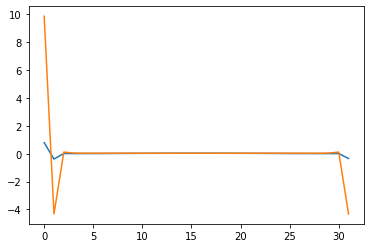

In [113]:
plt.plot(ori_STFT[4])
plt.plot(STFT[4])

In [102]:
STFT = []
window = np.hamming(window_length)
print(window.shape)

for idx in range(0, len(sig)-(window_length-1), shift):
    print('m_idx=',idx,'  idx+window_length=',idx+window_length)
    
    data = sig[idx:idx+window_length] * window
    F = data @ array_exp
    STFT.append(F)

STFT = np.array(STFT)
print(STFT.shape)
    



(32,)
m_idx= 0   idx+window_length= 32
m_idx= 16   idx+window_length= 48
m_idx= 32   idx+window_length= 64
m_idx= 48   idx+window_length= 80
m_idx= 64   idx+window_length= 96
m_idx= 80   idx+window_length= 112
m_idx= 96   idx+window_length= 128
m_idx= 112   idx+window_length= 144
m_idx= 128   idx+window_length= 160
m_idx= 144   idx+window_length= 176
m_idx= 160   idx+window_length= 192
m_idx= 176   idx+window_length= 208
m_idx= 192   idx+window_length= 224
m_idx= 208   idx+window_length= 240
m_idx= 224   idx+window_length= 256
m_idx= 240   idx+window_length= 272
m_idx= 256   idx+window_length= 288
m_idx= 272   idx+window_length= 304
m_idx= 288   idx+window_length= 320
m_idx= 304   idx+window_length= 336
m_idx= 320   idx+window_length= 352
m_idx= 336   idx+window_length= 368
m_idx= 352   idx+window_length= 384
m_idx= 368   idx+window_length= 400
m_idx= 384   idx+window_length= 416
m_idx= 400   idx+window_length= 432
m_idx= 416   idx+window_length= 448
m_idx= 432   idx+window_length= 464

In [76]:
print(len(idx_list))

512


In [142]:
STFT = np.array(STFT)

In [86]:
print(STFT.shape)

(63, 32)


C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


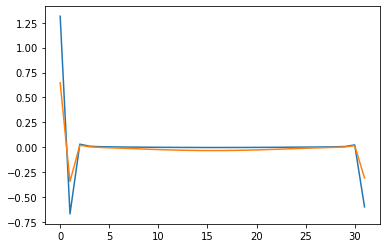

In [87]:
plt.plot(STFT[2])
plt.plot(STFT[50])

[[ 0.03094767+0.j         -0.1114537 +0.j        ]
 [-0.16777214-0.28958724j  0.03319739-0.23135737j]]
space
[[-0.62477404+0.0000000e+00j  0.03041028+0.0000000e+00j]
 [ 0.42266   +1.9732480e-17j -0.16976464+2.8846174e-01j]]


In [212]:
Mask  = 50.295
MSTFT = np.array(Mask * STFT)
print(type(Mask))
print(MSTFT.shape)

<class 'float'>
(144, 512)


In [146]:
print(STFT.shape)
print(MSTFT.shape)

(144, 512)
(144, 512)


In [232]:
print(IMSTFT[7,5])
print(ISTFT[7,5])

(-0.005245621822240914+6.097089640171855e-05j)
(-0.00010429708365127569+1.2122655612230722e-06j)


In [213]:
IMSTFT = []
for m in range(0, len(MSTFT),1):
    print(m)
    globals()['y{}'.format(m)] = []
    for l in range(0, window_length,1):
        y = 0
        for k in range(0, window_length,1):
            value = -1j * (((2*np.pi)*k*l)/window_length)
            y = y + ( MSTFT[m,k]*np.exp(value) )
        y = y / window_length
        globals()['y{}'.format(m)].append(y)
        
    IMSTFT.append(globals()['y{}'.format(m)])

IMSTFT = np.array(IMSTFT)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143


(63, 32)
<class 'numpy.ndarray'>
[[0.08       0.08941623 0.11727941 ... 0.11727941 0.08941623 0.08      ]
 [0.08       0.08941623 0.11727941 ... 0.11727941 0.08941623 0.08      ]
 [0.08       0.08941623 0.11727941 ... 0.11727941 0.08941623 0.08      ]
 ...
 [0.08       0.08941623 0.11727941 ... 0.11727941 0.08941623 0.08      ]
 [0.08       0.08941623 0.11727941 ... 0.11727941 0.08941623 0.08      ]
 [0.08       0.08941623 0.11727941 ... 0.11727941 0.08941623 0.08      ]]
63 32


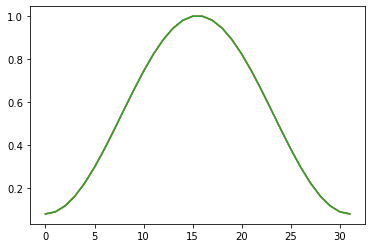

In [103]:
array_window = np.tile(window,(len(STFT),1))
print(array_window.shape)
print(type(array_window))
print(array_window)
print(len(STFT),window_length)
plt.plot(array_window[0])
plt.plot(array_window[60])
plt.plot(array_window[5])

In [45]:
a = np.array([[2,4,6],[8,10,12]])
b = np.array([[0,2,2],[2,1,2]])
print(a/b)
hamming = np.hamming(window_length)
print(window)

[[inf  2.  3.]
 [ 4. 10.  6.]]
[0.         0.01023503 0.04052109 0.08961828 0.15551654 0.23551799
 0.32634737 0.42428611 0.52532458 0.62532627 0.72019708 0.80605299
 0.87937906 0.93717331 0.97706963 0.99743466 0.99743466 0.97706963
 0.93717331 0.87937906 0.80605299 0.72019708 0.62532627 0.52532458
 0.42428611 0.32634737 0.23551799 0.15551654 0.08961828 0.04052109
 0.01023503 0.        ]


<ipython-input-45-0c7d708e28f7>:3: RuntimeWarning: divide by zero encountered in true_divide
  print(a/b)


In [104]:
array_exp_i = []
for l in range(0, window_length,1):
    print('l=',l)
    globals()['exp_i{}'.format(l)] = []
    for k in range(0, window_length,1):
        print('k=',k)
        value = -1j * (((2*np.pi)*k*l)/window_length)
        exp_i = np.exp(value)
        globals()['exp_i{}'.format(l)].append(exp_i)
    array_exp_i.append(globals()['exp_i{}'.format(l)])
    print(array_exp_i)
array_exp_i = np.array(array_exp_i)    
array_exp_i = array_exp_i.T

print(array_exp_i)

l= 0
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29
k= 30
k= 31
[[(1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j)]]
l= 1
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29
k= 30
k= 31
[[(1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j)], [(1-0j), (0.9807852804032304-0.19509032201612825j), (0.9238795325112867-0.3826834323650898j), (0.83146961230

k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29
k= 30
k= 31
[[(1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j), (1-0j)], [(1-0j), (0.9807852804032304-0.19509032201612825j), (0.9238795325112867-0.3826834323650898j), (0.8314696123025452-0.5555702330196022j), (0.7071067811865476-0.7071067811865476j), (0.5555702330196023-0.8314696123025452j), (0.38268343236508984-0.9238795325112867j), (0.19509032201612833-0.9807852804032304j), (6.123233995736766e-17-1j), (-0.1950903220161282-0.9807852804032304j), (-0.3826834323650897-0.9238795325112867j), (-0.555570233019602-0.8314696123025453j), (-0.7071067811865475-0.7071067811865476j), (-0.8314696123025453-0.5555702330196022j), (-0.9238795325112867-0.3826834323650899j), (-0.9807

In [121]:
ISTFT = []
window = np.hamming(window_length)
print(window.shape)

for m in range(0, len(STFT),1):
    print(m)
    
    x = STFT[m] @ array_exp_i
    print(x.shape)
    x = x / window
    print(x.shape)
    ISTFT.append(x)

ISTFT = np.array(STFT)
print(ISTFT.shape)

(32,)
0
(32,)
(32,)
1
(32,)
(32,)
2
(32,)
(32,)
3
(32,)
(32,)
4
(32,)
(32,)
5
(32,)
(32,)
6
(32,)
(32,)
7
(32,)
(32,)
8
(32,)
(32,)
9
(32,)
(32,)
10
(32,)
(32,)
11
(32,)
(32,)
12
(32,)
(32,)
13
(32,)
(32,)
14
(32,)
(32,)
15
(32,)
(32,)
16
(32,)
(32,)
17
(32,)
(32,)
18
(32,)
(32,)
19
(32,)
(32,)
20
(32,)
(32,)
21
(32,)
(32,)
22
(32,)
(32,)
23
(32,)
(32,)
24
(32,)
(32,)
25
(32,)
(32,)
26
(32,)
(32,)
27
(32,)
(32,)
28
(32,)
(32,)
29
(32,)
(32,)
30
(32,)
(32,)
31
(32,)
(32,)
32
(32,)
(32,)
33
(32,)
(32,)
34
(32,)
(32,)
35
(32,)
(32,)
36
(32,)
(32,)
37
(32,)
(32,)
38
(32,)
(32,)
39
(32,)
(32,)
40
(32,)
(32,)
41
(32,)
(32,)
42
(32,)
(32,)
43
(32,)
(32,)
44
(32,)
(32,)
45
(32,)
(32,)
46
(32,)
(32,)
47
(32,)
(32,)
48
(32,)
(32,)
49
(32,)
(32,)
50
(32,)
(32,)
51
(32,)
(32,)
52
(32,)
(32,)
53
(32,)
(32,)
54
(32,)
(32,)
55
(32,)
(32,)
56
(32,)
(32,)
57
(32,)
(32,)
58
(32,)
(32,)
59
(32,)
(32,)
60
(32,)
(32,)
61
(32,)
(32,)
62
(32,)
(32,)
(63, 32)


In [128]:
a = np.array([1, 2 ,3 ,4])
b = np.array([[1,2,3,4],[1,2,3,4,],[1,2,3,4],[1,2,3,4]])
c = a@b
d = c / a
print(c, d)

[10 20 30 40] [10. 10. 10. 10.]


In [134]:
ori_ISTFT = []
array_window = np.tile(window,(len(STFT),1))
orig_STFT = STFT / array_window
print(orig_STFT[5,5])
for m in range(0, len(STFT),1):
    print(m)
    globals()['y{}'.format(m)] = []
    for l in range(0, window_length,1):
        y = 0
        for k in range(0, window_length,1):
            value = -1j * (((2*np.pi)*k*l)/window_length)
            y = y + ( orig_STFT[m,k]*np.exp(value) )
        y = y / window_length
        globals()['y{}'.format(m)].append(y)
        
    ori_ISTFT.append(globals()['y{}'.format(m)])

ori_ISTFT = np.array(ori_ISTFT)
print(ori_ISTFT.shape)
print(pri_ISTFT)

(0.10585837461946672+0.18155213572437973j)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
(63, 32)


NameError: name 'pri_ISTFT' is not defined

In [193]:
print(IMSTFT.shape)

(144, 512)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121

<ipython-input-168-14db5afa920d>:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  z = z_numerator / z_denominator



122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371

512


C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


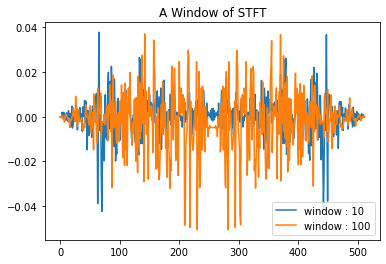

In [251]:
plt.plot(STFT[143],label='window : 10')
plt.title('A Window of STFT')
plt.plot(STFT[100],label='window : 100')
plt.legend()

(73728, 1)


IndexError: index 1 is out of bounds for axis 1 with size 1

In [192]:
# Z = []
# for i in range(0, len(IMSTFT)-(window_length-1), shift):
#     print(i)
#     idx_list = []
#     for idx in range(i,i+window_length,1):
#         idx_list.append(idx)
#     globals()['z{}'.format(i)] = []
#     for m in range(0, window_length,1):
#         up = 0
#         down = 0
#         for l, idx in enumerate(idx_list):
#             up = up + ( window[l]*IMSTFT[idx,0] )
#             down = down + (window[l])**2
#         z = up / down
#         globals()['z{}'.format(i)].append(z)
        
#     STFT.append(globals()['F{}'.format(i)])
        
# Z = []
# for m in range(0,len(IMSTFT),1):
    


0
256
512
768
1024
1280
1536
1792
2048
2304
2560
2816
3072
3328
3584
3840
4096
4352
4608
4864
5120
5376
5632
5888
6144
6400
6656
6912
7168
7424
7680
7936
8192
8448
8704
8960
9216
9472
9728
9984
10240
10496
10752
11008
11264
11520
11776
12032
12288
12544
12800
13056
13312
13568
13824
14080
14336
14592
14848
15104
15360
15616
15872
16128
16384
16640
16896
17152
17408
17664
17920
18176
18432
18688
18944
19200
19456
19712
19968
20224
20480
20736
20992
21248
21504
21760
22016
22272
22528
22784
23040
23296
23552
23808
24064
24320
24576
24832
25088
25344
25600
25856
26112
26368
26624
26880
27136
27392
27648
27904
28160
28416
28672
28928
29184
29440
29696
29952
30208
30464
30720
30976
31232
31488
31744
32000
32256
32512
32768
33024
33280
33536
33792
34048
34304
34560
34816
35072
35328
35584
35840
36096
36352
36608
36864
37120
37376
37632
37888
38144
38400
38656
38912
39168
39424
39680
39936
40192
40448
40704
40960
41216
41472
41728
41984
42240
42496
42752
43008
43264
43520
43776
44032
44288
44

(19, 32)
19


320


<class 'numpy.ndarray'>
[0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 256, 272, 288]


In [214]:
##zero padding of IMSTFT window To Griffin-Lim
window_IMSTFT = []
idx_list = []
sq_window = []
window = np.hanning(window_length)
print(window_length)
print(shift)

for m in range(0, len(sig)-(window_length-1), shift):
    print(m)
    idx_list.append(m)
    
print(idx_list)    

for i, idx in enumerate(idx_list):
    print(i, idx, idx+window_length)
    
    window_list = np.zeros(len(sig))
    window_list[idx:idx+window_length] = IMSTFT[i] * window
    window_IMSTFT.append(window_list)
    
    sq_window_list = np.zeros(len(sig))
    sq_window_list[idx:idx+window_length] = window**2
    sq_window.append(sq_window_list)
    
window_IMSTFT = np.array(window_IMSTFT)
sq_window = np.array(sq_window)

print(window_IMSTFT.shape)
print(sq_window.shape)    
    
    

512
256
0
256
512
768
1024
1280
1536
1792
2048
2304
2560
2816
3072
3328
3584
3840
4096
4352
4608
4864
5120
5376
5632
5888
6144
6400
6656
6912
7168
7424
7680
7936
8192
8448
8704
8960
9216
9472
9728
9984
10240
10496
10752
11008
11264
11520
11776
12032
12288
12544
12800
13056
13312
13568
13824
14080
14336
14592
14848
15104
15360
15616
15872
16128
16384
16640
16896
17152
17408
17664
17920
18176
18432
18688
18944
19200
19456
19712
19968
20224
20480
20736
20992
21248
21504
21760
22016
22272
22528
22784
23040
23296
23552
23808
24064
24320
24576
24832
25088
25344
25600
25856
26112
26368
26624
26880
27136
27392
27648
27904
28160
28416
28672
28928
29184
29440
29696
29952
30208
30464
30720
30976
31232
31488
31744
32000
32256
32512
32768
33024
33280
33536
33792
34048
34304
34560
34816
35072
35328
35584
35840
36096
36352
36608
[0, 256, 512, 768, 1024, 1280, 1536, 1792, 2048, 2304, 2560, 2816, 3072, 3328, 3584, 3840, 4096, 4352, 4608, 4864, 5120, 5376, 5632, 5888, 6144, 6400, 6656, 6912, 7168, 7424,

<ipython-input-214-fb2eb648c26c>:19: ComplexWarning: Casting complex values to real discards the imaginary part
  window_list[idx:idx+window_length] = IMSTFT[i] * window


 23296 23808
92 23552 24064
93 23808 24320
94 24064 24576
95 24320 24832
96 24576 25088
97 24832 25344
98 25088 25600
99 25344 25856
100 25600 26112
101 25856 26368
102 26112 26624
103 26368 26880
104 26624 27136
105 26880 27392
106 27136 27648
107 27392 27904
108 27648 28160
109 27904 28416
110 28160 28672
111 28416 28928
112 28672 29184
113 28928 29440
114 29184 29696
115 29440 29952
116 29696 30208
117 29952 30464
118 30208 30720
119 30464 30976
120 30720 31232
121 30976 31488
122 31232 31744
123 31488 32000
124 31744 32256
125 32000 32512
126 32256 32768
127 32512 33024
128 32768 33280
129 33024 33536
130 33280 33792
131 33536 34048
132 33792 34304
133 34048 34560
134 34304 34816
135 34560 35072
136 34816 35328
137 35072 35584
138 35328 35840
139 35584 36096
140 35840 36352
141 36096 36608
142 36352 36864
143 36608 37120
(144, 37120)
(144, 37120)


In [135]:
##zero padding of window ot ISTFT
ori_window_ISTFT = []
idx_list = []


for m in range(0, len(sig)-(window_length-1), shift):
    idx_list.append(m)
    
print(idx_list)    

for i, idx in enumerate(idx_list):
    print(i, idx, idx+window_length)
    
    window_list = np.zeros(len(sig))
    window_list[idx:idx+window_length] = ori_ISTFT[i]
    ori_window_ISTFT.append(window_list)
    
ori_window_ISTFT = np.array(ori_window_ISTFT)

print(ori_window_ISTFT.shape)
print(ori_window_ISTFT)
    

[0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 256, 272, 288, 304, 320, 336, 352, 368, 384, 400, 416, 432, 448, 464, 480, 496, 512, 528, 544, 560, 576, 592, 608, 624, 640, 656, 672, 688, 704, 720, 736, 752, 768, 784, 800, 816, 832, 848, 864, 880, 896, 912, 928, 944, 960, 976, 992]
0 0 32
1 16 48
2 32 64
3 48 80
4 64 96
5 80 112
6 96 128
7 112 144
8 128 160
9 144 176
10 160 192
11 176 208
12 192 224
13 208 240
14 224 256
15 240 272
16 256 288
17 272 304
18 288 320
19 304 336
20 320 352
21 336 368
22 352 384
23 368 400
24 384 416
25 400 432
26 416 448
27 432 464
28 448 480
29 464 496
30 480 512
31 496 528
32 512 544
33 528 560
34 544 576
35 560 592
36 576 608
37 592 624
38 608 640
39 624 656
40 640 672
41 656 688
42 672 704
43 688 720
44 704 736
45 720 752
46 736 768
47 752 784
48 768 800
49 784 816
50 800 832
51 816 848
52 832 864
53 848 880
54 864 896
55 880 912
56 896 928
57 912 944
58 928 960
59 944 976
60 960 992
61 976 1008
62 992 1024
(63, 1024)
[[ 0.3589

<ipython-input-135-a37f54c294a6>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  window_list[idx:idx+window_length] = ori_ISTFT[i]


In [215]:
##zero padding of window ot IMSTFT
window_IMSTFT = []
idx_list = []

window = np.hanning(window_length)
print(window_length)
print(shift)

for m in range(0, len(sig)-(window_length-1), shift):
    idx_list.append(m)
    
print(idx_list)    

for i, idx in enumerate(idx_list):
    print(i, idx, idx+window_length)
    
    window_list = np.zeros(len(sig))
    window_list[idx:idx+window_length] = IMSTFT[i] * window
    window_IMSTFT.append(window_list)
    
window_IMSTFT = np.array(window_IMSTFT)

print(window_IMSTFT.shape)
    

512
256
[0, 256, 512, 768, 1024, 1280, 1536, 1792, 2048, 2304, 2560, 2816, 3072, 3328, 3584, 3840, 4096, 4352, 4608, 4864, 5120, 5376, 5632, 5888, 6144, 6400, 6656, 6912, 7168, 7424, 7680, 7936, 8192, 8448, 8704, 8960, 9216, 9472, 9728, 9984, 10240, 10496, 10752, 11008, 11264, 11520, 11776, 12032, 12288, 12544, 12800, 13056, 13312, 13568, 13824, 14080, 14336, 14592, 14848, 15104, 15360, 15616, 15872, 16128, 16384, 16640, 16896, 17152, 17408, 17664, 17920, 18176, 18432, 18688, 18944, 19200, 19456, 19712, 19968, 20224, 20480, 20736, 20992, 21248, 21504, 21760, 22016, 22272, 22528, 22784, 23040, 23296, 23552, 23808, 24064, 24320, 24576, 24832, 25088, 25344, 25600, 25856, 26112, 26368, 26624, 26880, 27136, 27392, 27648, 27904, 28160, 28416, 28672, 28928, 29184, 29440, 29696, 29952, 30208, 30464, 30720, 30976, 31232, 31488, 31744, 32000, 32256, 32512, 32768, 33024, 33280, 33536, 33792, 34048, 34304, 34560, 34816, 35072, 35328, 35584, 35840, 36096, 36352, 36608]
0 0 512
1 256 768
2 512 1024


<ipython-input-215-aba7ffc8c600>:18: ComplexWarning: Casting complex values to real discards the imaginary part
  window_list[idx:idx+window_length] = IMSTFT[i] * window


In [216]:
### Calculate griffin-lim algorithm
up_sum = 0
down_sum = 0
for i in range(0, len(window_IMSTFT), 1):
    up_sum = up_sum + window_IMSTFT[i]
    down_sum = down_sum + sq_window[i]
    print(i)
print(up_sum.shape)
print(down_sum.shape)
Result = up_sum / down_sum
print(Result.shape)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
(37120,)
(37120,)
(37120,)


<ipython-input-216-ea76ba7f9793>:10: RuntimeWarning: invalid value encountered in true_divide
  Result = up_sum / down_sum


In [217]:
### Sum window of IMSTFT
NOT_Original_by_me = 0
for i in range(0, len(window_IMSTFT), 1):
    NOT_Original_by_me = NOT_Original_by_me + window_IMSTFT[i]
    print(i)
print(NOT_Original_by_me.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
(37120,)


In [136]:
### Sum window of ISTFT
ori_Original_by_me = 0
for i in range(0, len(ori_window_ISTFT), 1):
    ori_Original_by_me = ori_Original_by_me + ori_window_ISTFT[i]
    print(i)
print(ori_Original_by_me.shape)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
(1024,)


C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


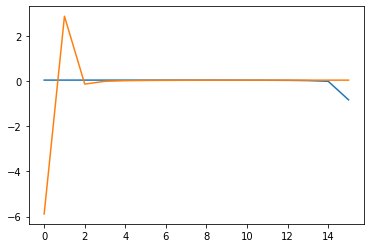

In [133]:
plt.plot(ISTFT[5,16:])
plt.plot(ISTFT[6,:16])

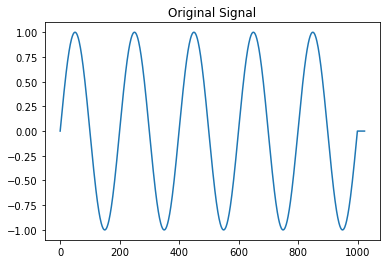

[[ 7.72486855 -3.6908893   0.16548374 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.00972809 -0.03815882
  -0.09762472]]


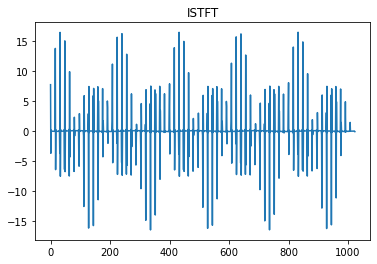

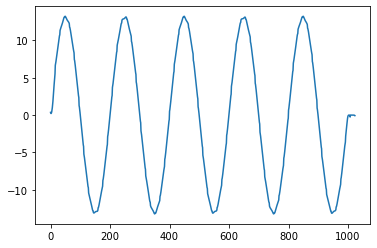

In [137]:
plt.plot(sig)
plt.title('Original Signal')
plt.show()
plt.plot(Original_by_me)
plt.title('ISTFT')
print(window_ISTFT)
plt.show()
plt.plot(ori_Original_by_me)

In [139]:
error = sig - Original_by_me
print(error)

[-7.72486855  3.72233149 -0.10263045 ... -0.00972809  0.03815882
  0.09762472]


In [224]:
# plt.plot(Original_by_me[256:36608])
# plt.title('ISTFT(sr=16000)')
# plt.show()
print((NOT_Original_by_me[500])
# plt.plot(NOT_Original_by_me[256:36608])
# plt.title('IMSTFT(Mask=float, sr=16000, Not Origin)')

SyntaxError: unexpected EOF while parsing (<ipython-input-224-f22ab380941f>, line 6)

[         nan 279.1123698  212.67148865 ...  -1.01517721  -5.37078978
          nan]


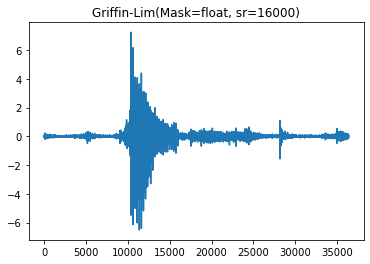

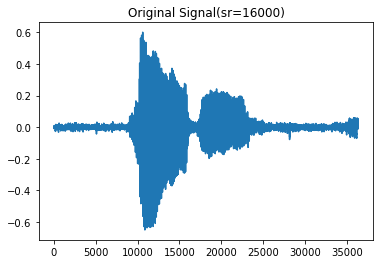

In [220]:
print(Result)
plt.plot(Result[256:36608])
plt.title('Griffin-Lim(Mask=float, sr=16000)')
plt.show()
plt.title("Original Signal(sr=16000)")
plt.plot(sig[256:36608])

In [210]:
sf.write('result(mask=exp,sr=16000).wav', Result[256:36608], sr, 'PCM_24')

In [177]:
sf.write('ISTFT(sr=16000).wav', Original_by_me[256:36608], sr, 'PCM_24')

In [211]:
sf.write('IMSTFT(mask=exp,sr=16000,not original).wav', NOT_Original_by_me[256:36608], sr, 'PCM_24')

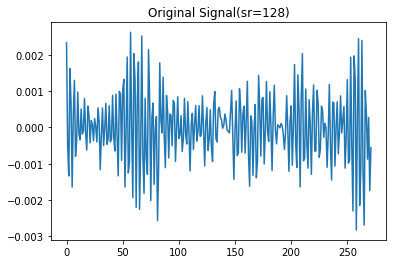

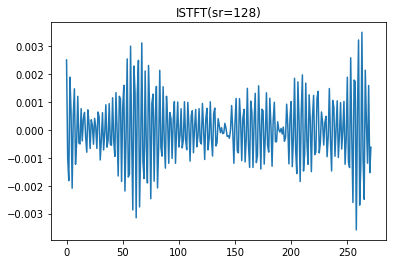

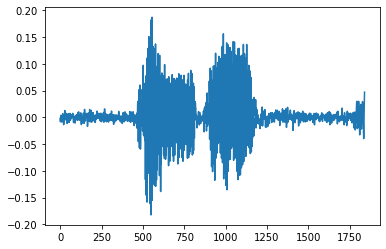

In [81]:
plt.plot(slice_sig)
plt.title("Original Signal(sr=128)")
plt.show()
plt.plot(ori[16:288])
plt.title("ISTFT(sr=128)")
plt.show()
plt.plot(istft)

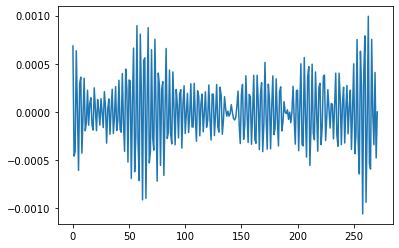

In [90]:
plt.plot(not_original[16:288])

In [64]:
slice_sig = sig[16:288]

[ 3.85983105e-04  4.22885556e-04 -3.09409342e-04 -3.52290982e-04
  3.42267359e-04  1.42670447e-04 -3.37083220e-04  1.60095505e-04
  2.13443630e-04 -4.66793480e-04  2.34483603e-05  5.96798761e-04
 -3.79846192e-04 -4.70569275e-04  7.31495575e-04  1.50528329e-04
 -1.81684557e-03  5.31352234e-04  1.41090534e-03 -1.24738157e-03
 -6.42321062e-04  1.48206315e-03 -2.25307369e-04 -1.10680368e-03
  8.03966486e-04  3.93125634e-04 -8.45954472e-04  2.75143560e-04
  3.99325126e-04 -5.30969870e-04  2.59226146e-04 -3.07763496e-04
 -4.73457616e-04  1.04318694e-04  6.12190760e-04 -4.63946906e-04
 -2.18018030e-04  4.73817345e-04 -2.30393612e-04 -1.46971147e-04
  3.79049479e-04 -2.74437509e-04 -1.01304757e-04  5.04947105e-04
 -4.27912741e-04 -4.13035477e-04  7.53860957e-04  3.72343635e-04
 -4.77958235e-04  4.89218005e-04  1.50846587e-04 -6.61352586e-04
  3.97508203e-04  3.18483914e-04 -6.74498141e-04  3.27698841e-04
  4.59731542e-04 -8.18464953e-04  1.92314904e-04  7.42011461e-04
 -9.31802571e-04 -9.77879

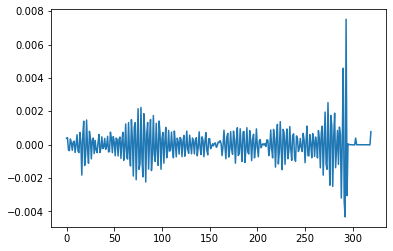

In [91]:
error = not_original - ori
print(error)
plt.plot(error)

C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\yegee\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


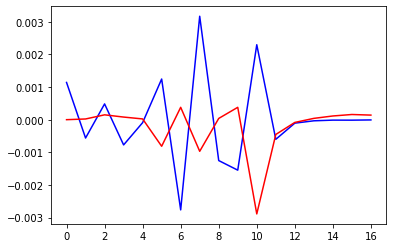

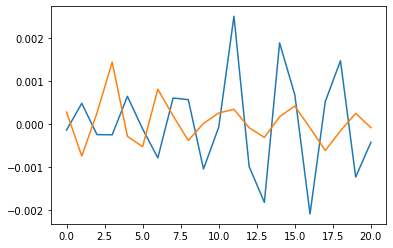

In [106]:
plt.plot(stft[:,10],c='b')
plt.plot(STFT[10,:17],c='r')
plt.show()

In [271]:
print(STFT.shape)
print(len(sig))
print((STFT.shape[0]+1)*(STFT.shape[1]/2))
print(len(STFT))

(144, 512)
37120
37120.0
144
